# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [10]:
# Import warnings


import warnings
warnings.filterwarnings("ignore")

In [12]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('/Users/satyamdubey/Downloads/python/AI&ML/Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
os.chdir('/Users/satyamdubey/Downloads/python/AI&ML/Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records')
# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        
        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['tpep_pickup_datetime'].dt.date.unique():
                date_df = pd.DataFrame()
                date_df = monthly_data[monthly_data['tpep_pickup_datetime'].dt.date == date]
                sampled_data = pd.DataFrame()
                
                for hour in range(24): # Iterate through each hour of the selected date
                    hour_data= pd.DataFrame()
                    sample = pd.DataFrame()
                    hour_data = date_df[date_df['tpep_pickup_datetime'].dt.hour == hour] # add data of this hour to the dataframe
                    
                    sample = hour_data.sample(frac = 0.05, random_state = 42) # Sample 5% of the hourly data randomly
                    
                    sampled_data = pd.concat([sampled_data, sample]) # Concatenate the sampled data of all the dates to a single dataframe
                    
                    
                df = pd.concat([df,sampled_data]) # adding data for this hour to the DF

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        
print(f" Data frame shape post sampling upto 5%: {df.shape}");

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('/Users/satyamdubey/Downloads/python/AI&ML/Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/Dataset/NYC_Taxi_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [2011]:
# Load the new data file

df = pd.read_parquet('/Users/satyamdubey/Downloads/python/AI&ML/Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/NYC_Taxi_2023.parquet')

In [2013]:
# df.head()

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1788               50             1        23.30    1.0      0.5        5.66   
3196699            61             0        22.43    0.0      0.5        3.00   
1408              161             1        10.70    1.0      0.5        3.14   
3196663           144             0        17.22    0.0      0.5        0.00   
3613               68             1         5.10    1.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
1788              0.0                    1.0         33.96   
3196699           0.0                    1.0         29.43   
1408              0.0                    1.0         18.84   
3196663           0.0                    1.0         21.22   
3613              0.0                    1.0         10.10   

         congestion_surcharge  Airport_fee  airport_fee  
1788                      2.5          0.0          NaN  
3196699                   NaN          NaN          NaN  
1408                      2.5          0.0          NaN  
3196663                   NaN          NaN          NaN  
3613                      2.5          0.0          NaN

In [2015]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 1788 to 3202916
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [2019]:
#verifing null value in data frame 
100*df.isnull().mean()

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.420903
trip_distance             0.000000
RatecodeID                3.420903
store_and_fwd_flag        3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.420903
Airport_fee              11.250633
airport_fee              92.170270
dtype: float64

In [2021]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
1896396         1  2023-06-30 23:22:42   2023-06-30 23:39:06              1.0   
1896397         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
1896398         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
1896399         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.99         1.0                  N           148   
1                 4.79         NaN               None           231   
2                 1.05         1.0                  N           161   
3                 2.08         NaN               None           137   
4                 0.40         1.0                  N            68   
...                ...         ...                ...           ...   
1896395           2.63         1.0                  N           170   
1896396           0.00        99.0                  N            90   
1896397           5.40         1.0                  N            87   
1896398           1.00         1.0                  N            87   
1896399           5.04         1.0                  N           209   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                  50             1        23.30    1.0      0.5        5.66   
1                  61             0        22.43    0.0      0.5        3.00   
2                 161             1        10.70    1.0      0.5        3.14   
3                 144             0        17.22    0.0      0.5        0.00   
4                  68             1         5.10    1.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896395           143             1        14.20    1.0      0.5        4.80   
1896396           232             1        18.20    0.0      0.5        0.00   
1896397           161             1        32.40    3.5      0.5        2.00   
1896398           231             2        10.70    3.5      0.5        0.00   
1896399           225             1        25.40    1.0      0.5        4.56   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         33.96   
1                 0.0                    1.0         29.43   
2                 0.0                    1.0         18.84   
3                 0.0                    1.0         21.22   
4                 0.0                    1.0         10.10   
...               ...                    ...           ...   
1896395           0.0                    1.0         24.00   
1896396           0.0                    1.0         19.70   
1896397           0.0                    1.0         39.40   
1896398           0.0                    1.0         15.70   
1896399           0.0                    1.0         34.96   

         congestion_surcharge  Airport_fee  airport_fee  
0                         2.5          0.0          NaN  
1                         NaN          NaN          NaN  
2                         2.5          0.0          NaN  
3                         NaN          NaN          NaN  
4                         2.5          0.0          NaN  
...                       ...          ...          ...  
1896395                   2.5          0.0          NaN  
1896396      

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [2024]:
#verifing null value in data frame 
100*df.isnull().mean()

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.420903
trip_distance             0.000000
RatecodeID                3.420903
store_and_fwd_flag        3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.420903
Airport_fee              11.250633
airport_fee              92.170270
dtype: float64

In [2026]:
# Combine the two airport fee columns

# dropping airport_fee column as it has 92% of null values

df.drop(['airport_fee'],axis=1,inplace=True)

In [2028]:
# reseting index 
df.reset_index(drop=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
1896396         1  2023-06-30 23:22:42   2023-06-30 23:39:06              1.0   
1896397         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
1896398         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
1896399         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.99         1.0                  N           148   
1                 4.79         NaN               None           231   
2                 1.05         1.0                  N           161   
3                 2.08         NaN               None           137   
4                 0.40         1.0                  N            68   
...                ...         ...                ...           ...   
1896395           2.63         1.0                  N           170   
1896396           0.00        99.0                  N            90   
1896397           5.40         1.0                  N            87   
1896398           1.00         1.0                  N            87   
1896399           5.04         1.0                  N           209   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                  50             1        23.30    1.0      0.5        5.66   
1                  61             0        22.43    0.0      0.5        3.00   
2                 161             1        10.70    1.0      0.5        3.14   
3                 144             0        17.22    0.0      0.5        0.00   
4                  68             1         5.10    1.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896395           143             1        14.20    1.0      0.5        4.80   
1896396           232             1        18.20    0.0      0.5        0.00   
1896397           161             1        32.40    3.5      0.5        2.00   
1896398           231             2        10.70    3.5      0.5        0.00   
1896399           225             1        25.40    1.0      0.5        4.56   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         33.96   
1                 0.0                    1.0         29.43   
2                 0.0                    1.0         18.84   
3                 0.0                    1.0         21.22   
4                 0.0                    1.0         10.10   
...               ...                    ...           ...   
1896395           0.0                    1.0         24.00   
1896396           0.0                    1.0         19.70   
1896397           0.0                    1.0         39.40   
1896398           0.0                    1.0         15.70   
1896399           0.0                    1.0         34.96   

         congestion_surcharge  Airport_fee  
0                         2.5          0.0  
1                         NaN          NaN  
2                         2.5          0.0  
3                         NaN          NaN  
4                         2.5          0.0  
...                       ...          ...  
1896395                   2.5          0.0  
1896396                   0.0          0.0  
1896397                   2.5          0.0  
1896398                   2

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [2031]:
# check where values of fare amount are negative

df[df['fare_amount'] <0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [2034]:
# Analyse RatecodeID for the negative fare amounts

df[df['RatecodeID'] <0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [2036]:
# Find which columns have negative values

df[(df['extra'] <0) | (df['mta_tax'] <0) | (df['tip_amount'] <0) | (df['tolls_amount'] <0) | (df['improvement_surcharge'] <0) | (df['total_amount'] <0) 
| (df['congestion_surcharge']<0 ) | (df['Airport_fee']<0 )]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
506540          2  2023-12-05 15:54:13   2023-12-05 15:54:37              1.0   
970322          2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
1285463         2  2023-12-12 06:57:09   2023-12-12 07:16:37              1.0   
1937748         2  2023-12-17 08:10:57   2023-12-17 08:28:46              1.0   
2166819         2  2023-12-19 15:33:14   2023-12-19 16:05:27              2.0   
...           ...                  ...                   ...              ...   
2227565         2  2023-06-21 16:01:44   2023-06-21 17:11:47              1.0   
2452743         2  2023-06-23 15:19:43   2023-06-23 15:36:43              1.0   
2635188         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
3075228         2  2023-06-29 17:52:22   2023-06-29 18:11:03              1.0   
3194581         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
506540            0.00         1.0                  N           132   
970322            0.00         2.0                  N           107   
1285463           3.30         1.0                  N           164   
1937748          11.27         1.0                  N           132   
2166819           5.83         1.0                  N           186   
...                ...         ...                ...           ...   
2227565          12.56         2.0                  N           132   
2452743           2.14         1.0                  N           142   
2635188           1.09         2.0                  N            90   
3075228           2.93         1.0                  N           246   
3194581           1.38         2.0                  N           249   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
506540            132             2          0.0    0.0     -0.5         0.0   
970322            137             2          0.0    0.0     -0.5         0.0   
1285463           239             2          0.0    0.0     -0.5         0.0   
1937748            70             2          0.0    0.0     -0.5         0.0   
2166819            87             2          0.0    0.0     -0.5         0.0   
...               ...           ...          ...    ...      ...         ...   
2227565           114             2          0.0    0.0     -0.5         0.0   
2452743           164             2          0.0    0.0     -0.5         0.0   
2635188           170             2          0.0    0.0     -0.5         0.0   
3075228           239             2          0.0    0.0     -0.5         0.0   
3194581           186             2          0.0    0.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
506540            0.0                   -1.0         -1.50   
970322            0.0                   -1.0         -4.00   
1285463           0.0                   -1.0         -4.00   
1937748           0.0                   -1.0         -3.25   
2166819           0.0                   -1.0         -4.00   
...               ...                    ...           ...   
2227565           0.0                   -1.0         -5.75   
2452743           0.0                   -1.0         -4.00   
2635188           0.0                   -1.0         -4.00   
3075228           0.0                   -1.0         -4.00   
3194581           0.0                   -1.0         -4.00   

         congestion_surcharge  Airport_fee  
506540                    0.0         0.00  
970322                   -2.5         0.00  
1285463                  -2.5         0.00  
1937748                   0.0        -1.75  
2166819                  -2.5         0.00  
...                       ...          ...  
2227565                  -2.5        -1.75  
2452743                  -2.5         0.00  
2635188                  -2.5         0.00  
3075228                  -2

In [2038]:
# fix these negative values

# dropping of rows having -ive values 

df = df[~((df['extra'] <0) | (df['mta_tax'] <0) | (df['tip_amount'] <0) | (df['tolls_amount'] <0) | (df['improvement_surcharge'] <0) | (df['total_amount'] <0) 
| (df['congestion_surcharge']<0 ) | (df['Airport_fee']<0 ))]


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [2042]:
# Find the proportion of missing values in each column
100*df.isnull().mean()


VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.421045
trip_distance             0.000000
RatecodeID                3.421045
store_and_fwd_flag        3.421045
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.421045
Airport_fee              11.250732
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [2045]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df[df['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3196665         2  2023-12-01 00:01:11   2023-12-01 00:15:53              NaN   
3196596         2  2023-12-01 00:02:18   2023-12-01 00:12:25              NaN   
3196651         1  2023-12-01 00:04:14   2023-12-01 00:25:16              NaN   
...           ...                  ...                   ...              ...   
3307189         1  2023-06-30 23:14:07   2023-06-30 23:25:45              NaN   
3307121         2  2023-06-30 23:40:46   2023-07-01 00:04:37              NaN   
3307126         2  2023-06-30 23:57:33   2023-07-01 00:09:15              NaN   
3307201         2  2023-06-30 23:36:40   2023-06-30 23:53:20              NaN   
3307230         1  2023-06-30 23:34:22   2023-07-01 00:32:59              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3196699           4.79         NaN               None           231   
3196663           2.08         NaN               None           137   
3196665           3.49         NaN               None           164   
3196596           1.79         NaN               None           142   
3196651           0.00         NaN               None           186   
...                ...         ...                ...           ...   
3307189           0.70         NaN               None           230   
3307121           4.46         NaN               None           143   
3307126           2.75         NaN               None           166   
3307201           5.18         NaN               None           148   
3307230          20.20         NaN               None           132   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3196699            61             0        22.43   0.00      0.5        3.00   
3196663           144             0        17.22   0.00      0.5        0.00   
3196665           262             0        17.83   0.00      0.5        0.00   
3196596           239             0         9.88   0.00      0.5        0.00   
3196651            74             0        30.31   0.00      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
3307189           186             0        11.40   1.00      0.5        2.46   
3307121            79             0        23.26   0.00      0.5        0.00   
3307126           142             0        16.14   0.00      0.5        0.00   
3307201           237             0        26.09   0.00      0.5        3.01   
3307230            74             0        70.00   1.75      0.5       11.97   

         tolls_amount  improvement_surcharge  total_amount  \
3196699          0.00                    1.0         29.43   
3196663          0.00                    1.0         21.22   
3196665          0.00                    1.0         21.83   
3196596          0.00                    1.0         13.88   
3196651          0.00                    1.0         34.31   
...               ...                    ...           ...   
3307189          0.00                    1.0         18.86   
3307121          0.00                    1.0         27.26   
3307126          0.00                    1.0         20.14   
3307201          0.00                    1.0         33.10   
3307230          6.55                    1.0         91.77   

         congestion_surcharge  Airport_fee  
3196699                   NaN          NaN  
3196663                   NaN          NaN  
3196665                   NaN          NaN  
3196596                   NaN          NaN  
3196651                   NaN          NaN  
...                       ...          ...  
3307189                   NaN          NaN  
3307121                   NaN          NaN  
3307126                   NaN          NaN  
3307201                   N

In [2047]:
# Impute NaN values in 'passenger_count'

df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

Did you find zeroes in passenger_count? Handle these.

In [2050]:
# Imputing Null value for passenger count

df.loc[df['passenger_count']==0] = df['passenger_count'].median()

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [2052]:
# Fix missing values in 'RatecodeID'

df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].median())

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [2055]:
# Handling null values in congestion_surcharge

df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [2057]:
# Handle any remaining missing values
df.isna().sum()


VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag        64874
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
Airport_fee              210742
dtype: int64

In [2061]:
# handle null values in store_and_fwd_flag

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

In [2063]:
# handle null values in Airport_fee

df['Airport_fee'] = df['Airport_fee'].fillna(df['Airport_fee'].median())

In [2065]:
# verifing missing values
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [2069]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()


VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896321e+06     1.896321e+06   1.896321e+06  1.896321e+06   
mean   1.732965e+00     1.372231e+00   3.830039e+00  1.610162e+00   
std    4.476722e-01     8.643989e-01   1.294108e+02  7.255263e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.010000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.760000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.370000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.263605e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896321e+06  1.896321e+06  1.896321e+06  1.896321e+06  1.896321e+06   
mean   1.626772e+02  1.614711e+02  1.159709e+00  1.966555e+01  1.552405e+00   
std    6.669102e+01  7.216560e+01  5.040203e-01  1.055455e+02  1.807599e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.610000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.330000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.896321e+06  1.896321e+06  1.896321e+06           1.896321e+06   
mean   5.032194e-01  3.515339e+00  6.060639e-01           9.990844e-01   
std    7.893511e-02  4.037601e+00  2.176450e+00           2.782530e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.800000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.400000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge   Airport_fee  
count  1.896321e+06          1.896321e+06  1.896321e+06  
mean   2.860019e+01          2.293654e+00  1.437922e-01  
std    1.064450e+02          6.706776e-01  4.587689e-01  
min    0.000000e+00          0.000000e+00  0.000000e+00  
25%    1.580000e+01          2.500000e+00  0.000000e+00  
50%    2.100000e+01          2.500000e+00  0.000000e+00  
75%    3.070000e+01          2.500000e+00  0.000000e+00  
max    1.431675e+05          2.500000e+00  1.750000e+00

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [2074]:
# Remove passenger_count > 6

df = df[~(df['passenger_count'] >6)]

In [2075]:
# Remove RatecodeID > 6, as value greater than 6 is invalid value as per data dictionary

df = df[~(df['RatecodeID'] >6)]

In [2077]:
# Analysing outlier for fare_amounts

df['fare_amount'].describe()

count    1.885863e+06
mean     1.959188e+01
std      1.058278e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64

<Axes: >

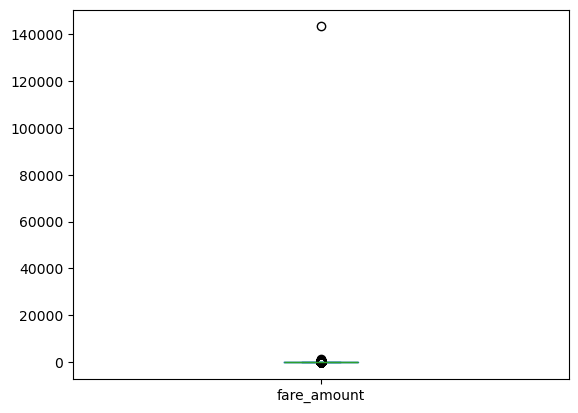

In [2080]:
# plotting box plot to understand outliers 


df['fare_amount'].plot.box()

In [2082]:
# Continue with outlier handling

# Handling trip_distancec & fare_amount where trip_distance =0 and fare_amount is more than

# As per box plot drawn for fare_amounts looks very high fare which is unreal. Hence considering fare_amount more than 500$ is outliers 

df = df[~(df['fare_amount'] >500)]

In [2084]:
# Handling trip_distancec outliers where trip_distance =0 

df = df[~(df['trip_distance'] ==0)]

In [2085]:
# removing fare_amount equal to zero

df = df[~(df['fare_amount']==0)]

In [2086]:
# removing trip_distance greater than 250

df = df[~(df['trip_distance'] >=250)]

In [2090]:
# removing payment_type equal to zero

df = df[~(df['payment_type']==0)]

In [2092]:
# $0.50 MTA tax that is automatically triggered based on the metered rate in use
# As per data dictionary more than 0.50 tax is not applicable. Hence removing such records

df.mta_tax.value_counts()

mta_tax
0.50    1758747
1.00      29681
0.00      11257
0.80         36
0.05         16
4.00          2
3.50          1
0.30          1
Name: count, dtype: int64

In [2094]:
df = df[~(df['mta_tax'] > 0.50)]

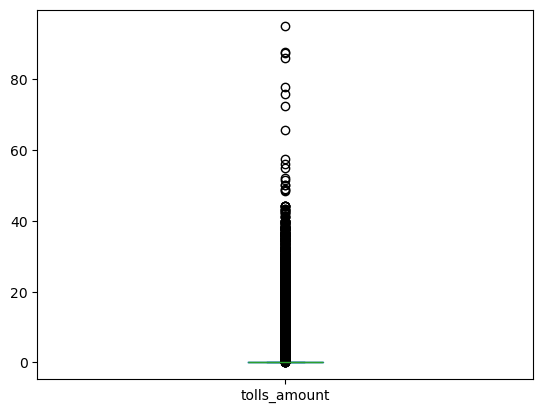

In [2098]:
# As per box plot drawn below tolls_amount > 40 $ has verify limited frequency. Hence removing tolls_amount >40 $

df.tolls_amount.plot.box()
plt.show()

In [2100]:
# Verifying Congestion_Surcharge column for outliers 

df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1653006
0.0     117015
Name: count, dtype: int64

In [2102]:
# As per data dictionary Airport_fee for drop off is 1.25 $, hence remvoing records having more than 1.25$

df['Airport_fee'].describe()

count    1.770021e+06
mean     1.354796e-01
std      4.576900e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.750000e+00
Name: Airport_fee, dtype: float64

In [2104]:
# Do any columns need standardising?

# Updating data type for tpep_pickup_datetime & tpep_dropoff_datetime columns

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Resting index post update 

df.reset_index(drop=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
2               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
3               2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
4               2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
...           ...                  ...                   ...              ...   
1770016         2  2023-06-30 23:19:44   2023-06-30 23:32:53              1.0   
1770017         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
1770018         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
1770019         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
1770020         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.99         1.0                  N           148   
1                 1.05         1.0                  N           161   
2                 0.40         1.0                  N            68   
3                 1.66         1.0                  N           114   
4                 2.45         1.0                  N           164   
...                ...         ...                ...           ...   
1770016           2.03         1.0                  N            79   
1770017           2.63         1.0                  N           170   
1770018           5.40         1.0                  N            87   
1770019           1.00         1.0                  N            87   
1770020           5.04         1.0                  N           209   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                  50             1         23.3    1.0      0.5        5.66   
1                 161             1         10.7    1.0      0.5        3.14   
2                  68             1          5.1    1.0      0.5        0.00   
3                 186             1         10.7    1.0      0.5        3.14   
4                 232             1         14.9    1.0      0.5        1.00   
...               ...           ...          ...    ...      ...         ...   
1770016           170             1         14.2    1.0      0.5        3.84   
1770017           143             1         14.2    1.0      0.5        4.80   
1770018           161             1         32.4    3.5      0.5        2.00   
1770019           231             2         10.7    3.5      0.5        0.00   
1770020           225             1         25.4    1.0      0.5        4.56   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         33.96   
1                 0.0                    1.0         18.84   
2                 0.0                    1.0         10.10   
3                 0.0                    1.0         18.84   
4                 0.0                    1.0         20.90   
...               ...                    ...           ...   
1770016           0.0                    1.0         23.04   
1770017           0.0                    1.0         24.00   
1770018           0.0                    1.0         39.40   
1770019           0.0                    1.0         15.70   
1770020           0.0                    1.0         34.96   

         congestion_surcharge  Airport_fee  
0                         2.5          0.0  
1                         2.5          0.0  
2                         2.5          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
1770016                   2.5          0.0  
1770017                   2.5          0.0  
1770018                   2.5          0.0  
1770019                   2

In [2106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1770021 entries, 1788 to 3202916
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [2109]:
# Displaying list of columns avaiable in data frame 

df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : Numerical
* `extra` : Numerical
* `mta_tax` : Numerical
* `tip_amount` : Numerical
* `tolls_amount` : Numerical
* `improvement_surcharge` : Numerical
* `total_amount` : Numerical
* `congestion_surcharge` : Numerical
* `airport_fee` : Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

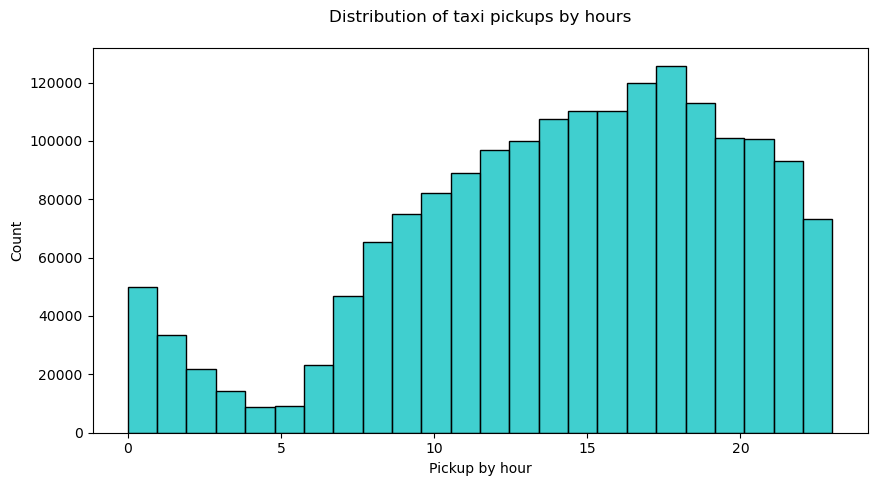

In [2115]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(10, 5))
sns.histplot(pd.to_datetime(df['tpep_pickup_datetime']).dt.hour,bins=24,color='c')

plt.xlabel('Pickup by hour')
plt.title('Distribution of taxi pickups by hours\n')
plt.show()

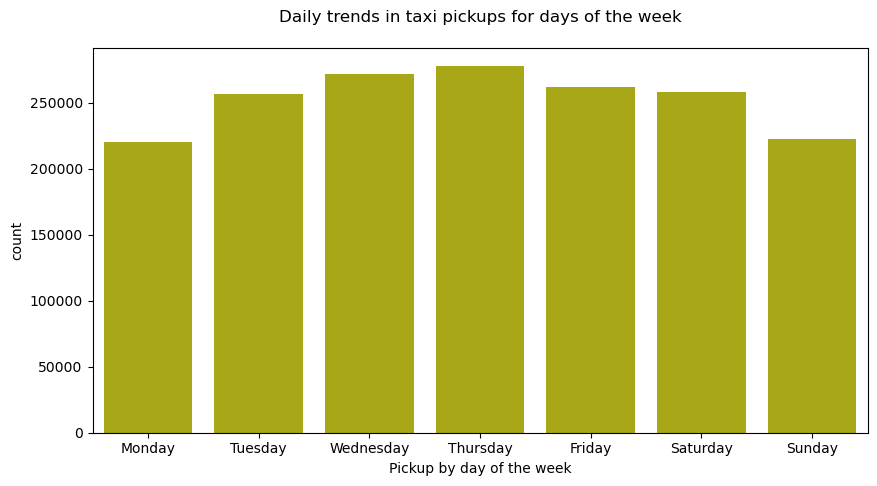

In [2117]:
# Find and show the daily trends in taxi pickups (days of the week)
# Setting plot size
plt.figure(figsize=(10,5))

weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x=pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name(),order=weeks,color='y')
# Plot title and axis
plt.title('Daily trends in taxi pickups for days of the week\n')
plt.xlabel('Pickup by day of the week')
plt.show()

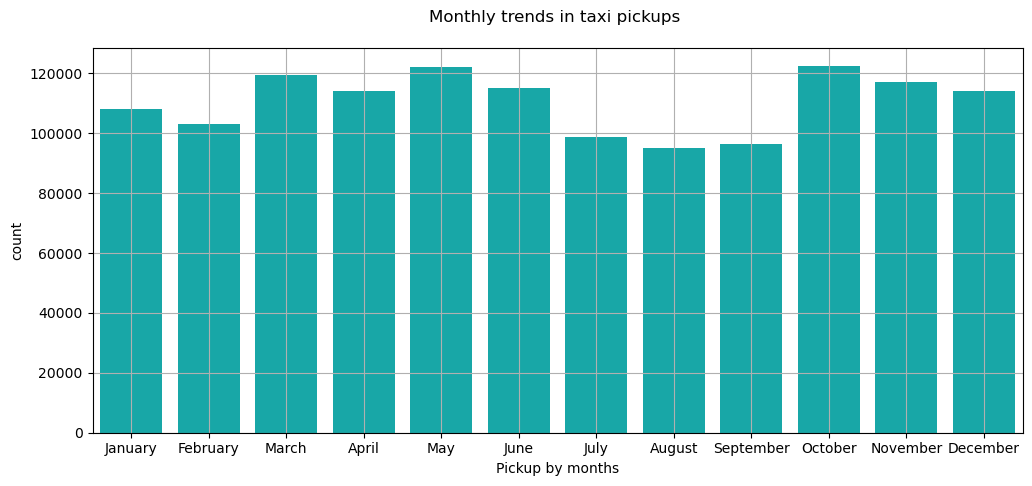

In [2241]:
# Show the monthly trends in pickups

# setting figure size
plt.figure(figsize=(12, 5))
# creating bins to display months in order 
Months_bins = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x=pd.to_datetime(df['tpep_pickup_datetime']).dt.month_name(),color='c',order=Months_bins) 
# adding lable and title
plt.title('Monthly trends in taxi pickups \n')
plt.grid(True)
plt.xlabel('Pickup by months')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [2123]:
# Analyse the above parameters

df[(df['fare_amount'] <0) | (df['tip_amount'] <0) | (df['total_amount'] <0) | (df['trip_distance'] <0 )]

print('No negative value found')


No negative value found


In [2125]:
# Analyse the above parameters

df[(df['fare_amount'] == 0) | (df['tip_amount'] == 0) | (df['total_amount'] == 0) | (df['trip_distance']  ==0 )]
print('No null value found')

No null value found


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [2129]:
# Create a df with non zero entries for the selected parameters.

df = df[~((df['fare_amount'] == 0) | (df['tip_amount'] == 0) | (df['total_amount'] == 0) | (df['trip_distance']  ==0 ))].reset_index(drop=True)


In [2131]:
# Filtering out records where pickup location and drop location is in the same

df = df[~(df['PULocationID'] == df['DOLocationID'])]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [2136]:
# Group data by month and analyse monthly revenue

# Creating new column pickup_Month to capture month of pickup_date 

df['pickup_Month'] = df['tpep_pickup_datetime'].dt.month_name()

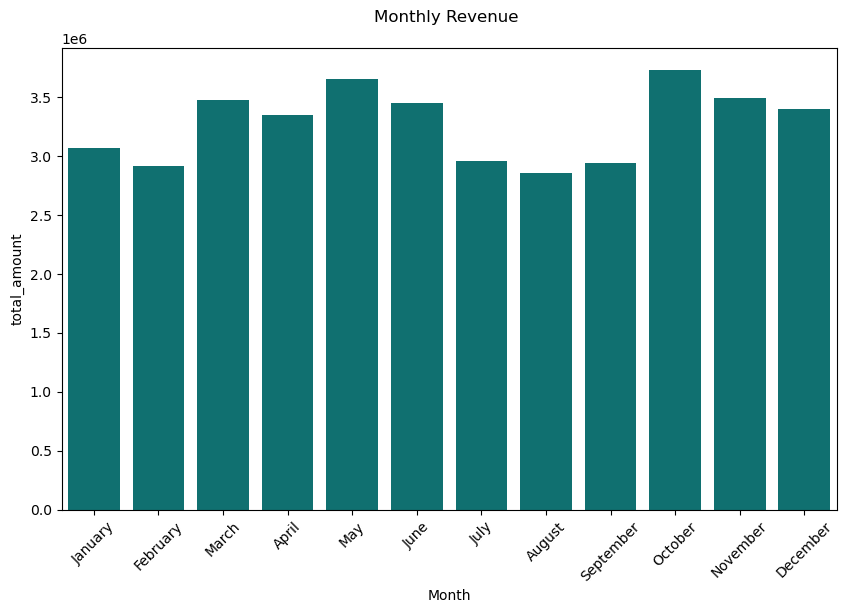

In [2237]:
# Grouping by pickup_month to analyis monthly revenue 
monthly_revenue = df.groupby('pickup_Month')['total_amount'].sum().sort_values(ascending=True).reset_index() 
# Setting figure size
plt.figure(figsize=(10, 6)) 
# creating bins to display months in order
Months_bins = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x='pickup_Month', y='total_amount', data = monthly_revenue,order=Months_bins,color='teal')
# Adding title and labels 
plt.xlabel('Month')

plt.title('Monthly Revenue \n')
plt.xticks(rotation=45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

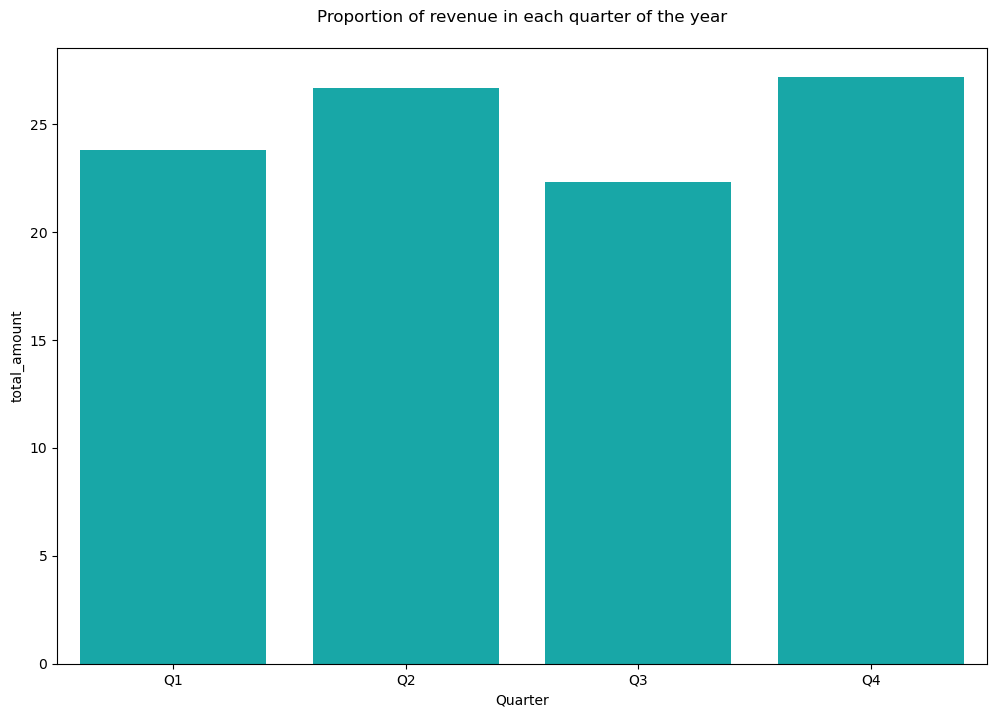

In [2141]:
# Calculate proportion of each quarter

plt.figure(figsize=(12, 8))

# add new column to data frame to capture quarter from pickup_date
df['Quarter'] = 'Q' + df['tpep_pickup_datetime'].dt.quarter.astype(str)

quarterly_revenue = df.groupby('Quarter')['total_amount'].sum() #total revenue in each quarter
quart_reven_pct = (quarterly_revenue / quarterly_revenue.sum()) * 100 # calculating percentage per quarter
quart_reven_pct = quart_reven_pct.reset_index() 
# ploting bar plot 
sns.barplot( data=quart_reven_pct,x='Quarter',y= 'total_amount',color='c')

# Adding labels and titile 
plt.xlabel('Quarter')
plt.title('Proportion of revenue in each quarter of the year\n')

plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [2144]:
# Verifying records where trip_distance ==0 

# No records found

df[df['trip_distance']==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, pickup_Month, Quarter]
Index: []

[0 rows x 21 columns]

In [2146]:
# Show relationship between fare and trip duration

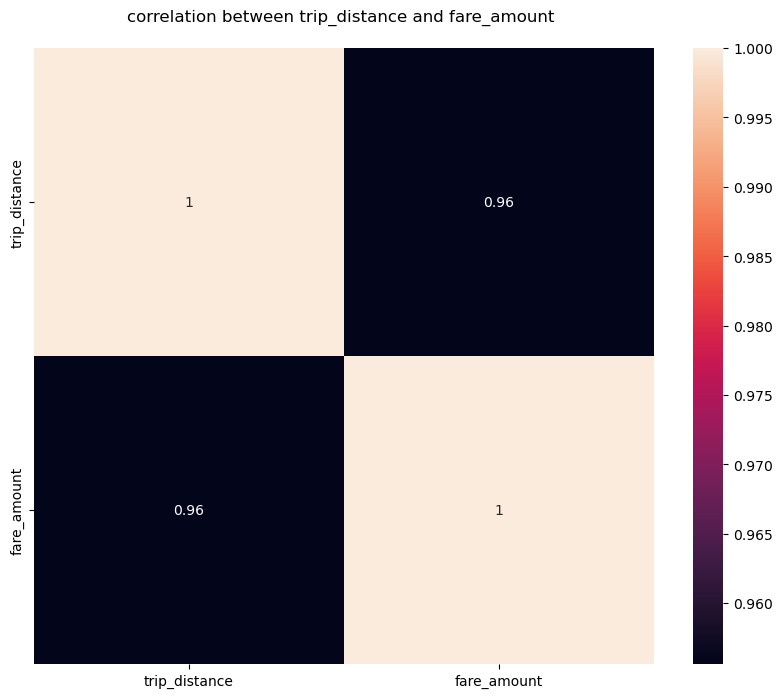

In [2148]:
# correlation between `trip_distance` and `fare_amount`

plt.figure(figsize=(10, 8))

#Creating heatmap to find the correlation 
sns.heatmap(df[['trip_distance','fare_amount']].corr(),annot=True)
# Adding title to plot
plt.title('correlation between trip_distance and fare_amount \n')
plt.show()

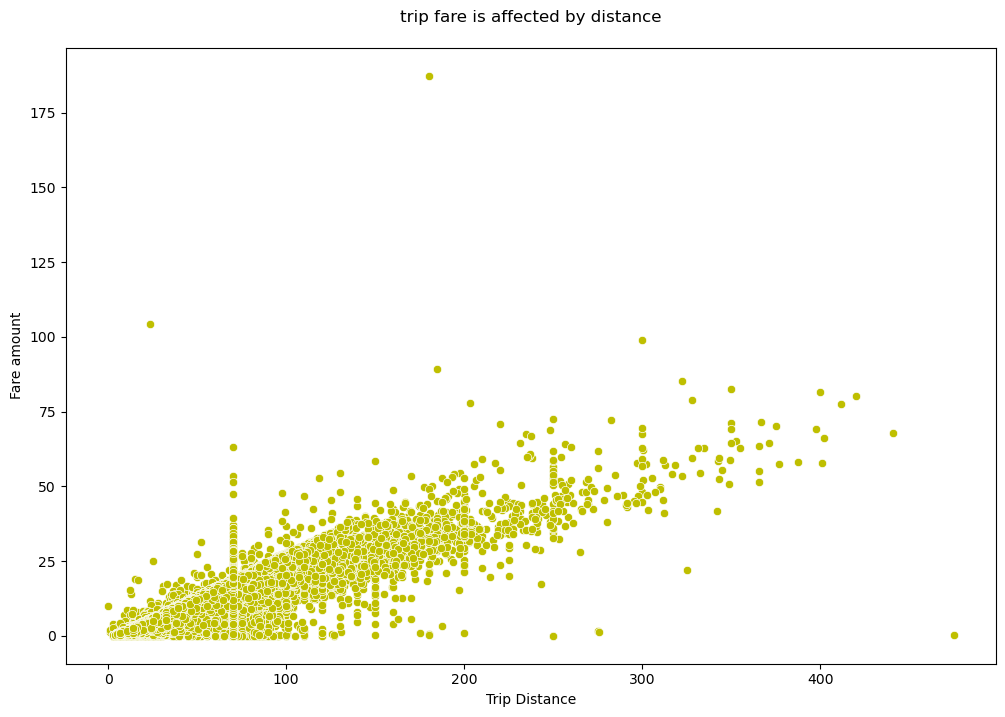

In [2150]:
# Show how trip fare is affected by distance

# Setting figur size
plt.figure(figsize=(12, 8))
sns.scatterplot(y=df['trip_distance'],x=df['fare_amount'],color='y')
# Adding title and lables 

plt.xlabel('Trip Distance')
plt.ylabel('Fare amount')
plt.title('trip fare is affected by distance\n')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [2153]:
# reseting index before trip_duration calcuation

df.reset_index(drop=True,inplace=True)

In [2155]:
# Creating new column to store trip_duration 

df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime)/pd.Timedelta(minutes=1)


In [2157]:
# Observe some negative value is trip_duration column as pickup time after dropoff time 

df[df['trip_duration'] <0 ]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
474658         2  2023-11-05 01:25:30   2023-11-05 01:08:04              3.0   
474663         2  2023-11-05 01:53:23   2023-11-05 01:02:12              2.0   
474672         2  2023-11-05 01:24:15   2023-11-05 01:03:15              1.0   
474674         2  2023-11-05 01:53:24   2023-11-05 01:00:39              1.0   
474680         2  2023-11-05 01:44:38   2023-11-05 01:05:43              1.0   
474687         1  2023-11-05 01:59:01   2023-11-05 01:14:45              1.0   
474689         2  2023-11-05 01:58:09   2023-11-05 01:23:58              1.0   
474691         1  2023-11-05 01:50:53   2023-11-05 01:02:37              1.0   
474709         2  2023-11-05 01:59:19   2023-11-05 01:12:55              2.0   
474722         1  2023-11-05 01:53:06   2023-11-05 01:00:52              1.0   
474729         1  2023-11-05 01:58:32   2023-11-05 01:13:26              2.0   
474752         2  2023-11-05 01:51:17   2023-11-05 01:18:13              2.0   
474764         1  2023-11-05 01:52:31   2023-11-05 01:03:17              2.0   
474780         1  2023-11-05 01:41:16   2023-11-05 01:01:11              1.0   
474787         2  2023-11-05 01:22:28   2023-11-05 01:10:25              1.0   
474793         2  2023-11-05 01:58:38   2023-11-05 01:08:06              1.0   
474802         2  2023-11-05 01:57:58   2023-11-05 01:05:33              2.0   
474816         1  2023-11-05 01:52:03   2023-11-05 01:00:42              1.0   
474819         2  2023-11-05 01:58:50   2023-11-05 01:13:41              1.0   
474821         2  2023-11-05 01:54:41   2023-11-05 01:00:23              1.0   
474828         2  2023-11-05 01:42:53   2023-11-05 01:05:36              1.0   
474840         2  2023-11-05 01:41:28   2023-11-05 01:08:04              1.0   
474841         2  2023-11-05 01:53:05   2023-11-05 01:07:15              1.0   
474842         2  2023-11-05 01:47:51   2023-11-05 01:00:49              3.0   
474868         2  2023-11-05 01:42:12   2023-11-05 01:04:24              1.0   
474880         2  2023-11-05 01:40:43   2023-11-05 01:06:12              1.0   
474905         2  2023-11-05 01:51:47   2023-11-05 01:09:07              1.0   
474914         2  2023-11-05 01:58:17   2023-11-05 01:14:41              1.0   
474931         1  2023-11-05 01:51:19   2023-11-05 01:04:06              1.0   
474934         2  2023-11-05 01:54:57   2023-11-05 01:03:08              1.0   
474943         1  2023-11-05 01:57:57   2023-11-05 01:05:21              3.0   
474950         2  2023-11-05 01:58:09   2023-11-05 01:08:11              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
474658           9.01         1.0                  N           114   
474663           1.84         1.0                  N           148   
474672           7.76         1.0                  N            68   
474674           2.36         1.0                  N           162   
474680           4.70         1.0                  N           249   
474687           3.40         1.0                  N           186   
474689           6.24         1.0                  N            68   
474691           3.50         1.0                  N           107   
474709           2.78         1.0                  N           114   
474722           1.30         1.0                  N           234   
474729           4.00         1.0                  N           249   
474752           7.15         1.0                  N           113   
474764           2.10         1.0                  N            50   
474780           5.00         1.0                  N           238   
474787           9.88         1.0                  N           114   
474793           1.84         1.0                  N           238   
474802           1.45         1.0                  N           163   
474816           2.00         1.0                  N           148   
474819           3.99         1.0    

In [2159]:
# Removing rows having trip_duration less than zero

df = df[~(df['trip_duration'] <0)]

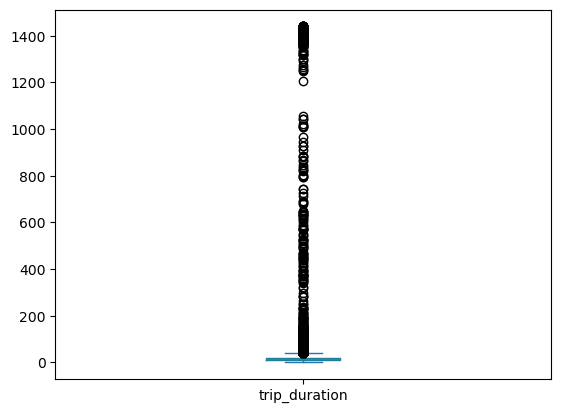

In [2161]:
# Observed some outlier in trip_duration column
df['trip_duration'].plot.box()
plt.show()

In [2163]:
# Handling outlier for trip_duration by using IQR

IQR = 2*(df.trip_duration.describe()[6] - df.trip_duration.describe()[4]) # IOR calcuation

ttl_out = df.trip_duration.describe()[6]+2*IQR  # calculating upper outlier range

df = df[~(df['trip_duration'] >ttl_out)] # Removing outlier where total_amount more than Q3+1.5*IQR

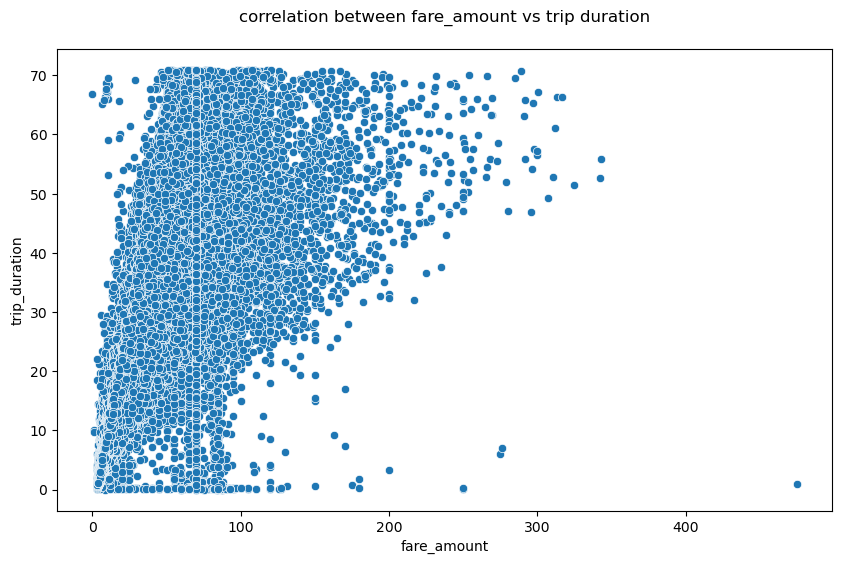

In [2165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['fare_amount'],y=df['trip_duration'])
plt.title('correlation between fare_amount vs trip duration\n')
plt.show()

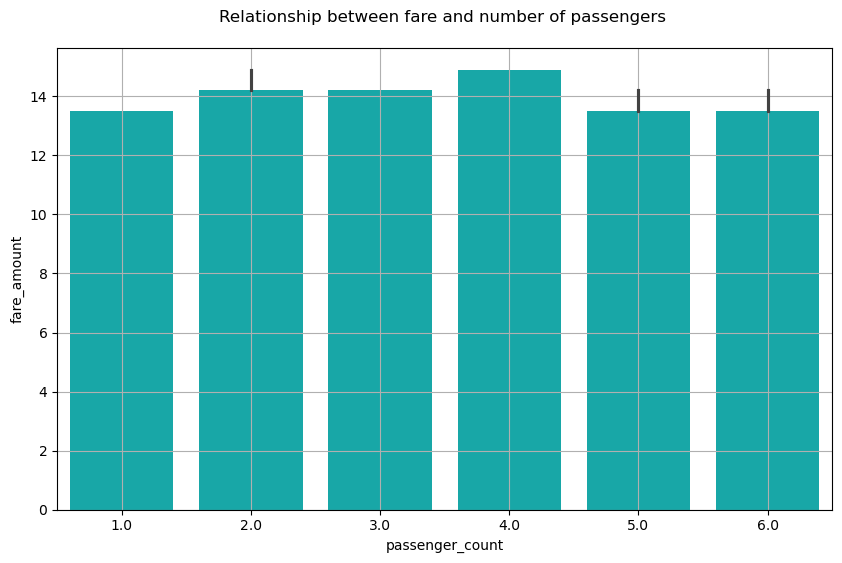

In [2249]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.barplot(x=df['passenger_count'],y=df['fare_amount'],estimator=np.median,color='c')
plt.title('Relationship between fare and number of passengers \n')
plt.grid(True)
plt.show()

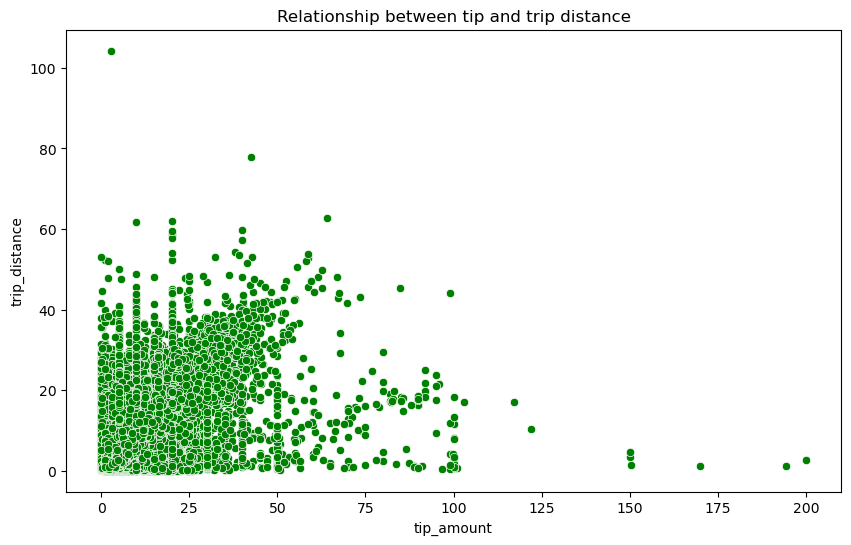

In [2169]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tip_amount'],y=df['trip_distance'],color='g')
plt.title('Relationship between tip and trip distance')
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1325737
2         21
4         13
3          5
Name: count, dtype: int64


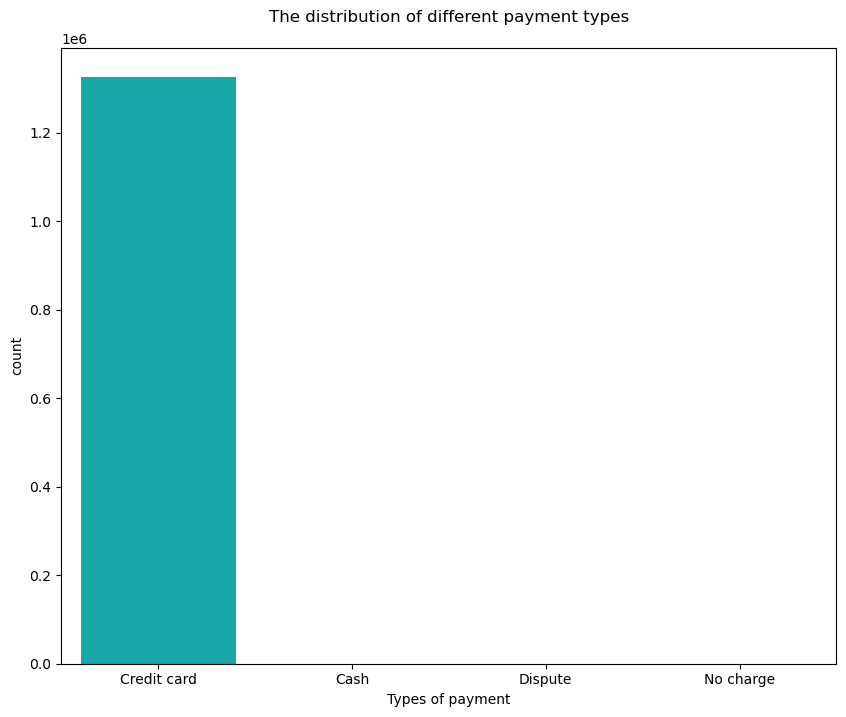

In [2172]:
plt.figure(figsize=(10, 8))
payment_type_counts = df.payment_type.value_counts()

# Mapping payment_type to labels  
payment_labels = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

print(payment_type_counts)

# Map integer index to labels
payment_type_counts.index = payment_type_counts.index.astype(int).map(payment_labels)
payment_type_counts = payment_type_counts.reset_index()

sns.barplot(data=payment_type_counts,x='payment_type',y='count',color='c')

# Adding label and title
plt.xlabel('Types of payment')
plt.title('The distribution of different payment types\n')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1065]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [2178]:
 import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/Users/satyamdubey/Downloads/python/AI&ML/Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/taxi_zones')# .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

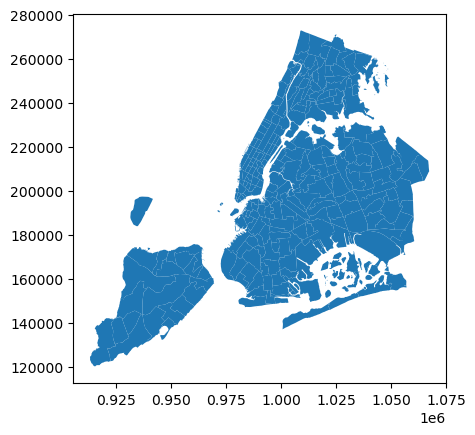

In [2181]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [2196]:
# Merge zones and trip records using locationID and PULocationID
            
trip_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='inner')

In [2253]:
trip_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
2         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
3         2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   
4         2  2023-12-01 00:14:06   2023-12-01 00:18:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           1.66         1.0                  N           114           186   
2           2.45         1.0                  N           164           232   
3           1.08         1.0                  N           114           231   
4           1.37         1.0                  N           239            24   

   payment_type  ...  pickup_Month  Quarter  trip_duration  OBJECTID  \
0             1  ...      December       Q4      22.350000       148   
1             1  ...      December       Q4       8.683333       114   
2             1  ...      December       Q4      13.016667       164   
3             1  ...      December       Q4       6.333333       114   
4             1  ...      December       Q4       3.933333       239   

   Shape_Leng  Shape_Area                     zone  LocationID    borough  \
0    0.039131    0.000070          Lower East Side         148  Manhattan   
1    0.031727    0.000047  Greenwich Village South         114  Manhattan   
2    0.035772    0.000056            Midtown South         164  Manhattan   
3    0.031727    0.000047  Greenwich Village South         114  Manhattan   
4    0.063626    0.000205    Upper West Side South         239  Manhattan   

                                            geometry  
0  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  POLYGON ((986306.712 203122.786, 986300.242 20...  
2  POLYGON ((988787.425 210315.593, 988662.868 21...  
3  POLYGON ((986306.712 203122.786, 986300.242 20...  
4  POLYGON ((991168.979 226252.992, 991955.565 22...  

[5 rows x 29 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [2256]:
# Group data by location and calculate the number of trips

# Group by Location to calculate number of trip
pickup_counts = trip_df.groupby(['LocationID','zone']).size().reset_index(name='trip_count')

print('Trip count by location: \n',pickup_counts.sort_values(by='trip_count',ascending=False).reset_index(drop=True).head(10))

Trip count by location: 
    LocationID                          zone  trip_count
0         161                Midtown Center       64264
1         237         Upper East Side South       62372
2         132                   JFK Airport       57765
3         236         Upper East Side North       56125
4         138             LaGuardia Airport       50414
5         162                  Midtown East       50347
6         186  Penn Station/Madison Sq West       47321
7         142           Lincoln Square East       46222
8         230     Times Sq/Theatre District       42478
9         170                   Murray Hill       41129


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [2210]:
# Merge trip counts back to the zones GeoDataFrame
zones_df = pd.merge(zones, pickup_counts, on='LocationID')


In [2228]:
# Fill na in trip_count columns with zero
zones_df['trip_count'] = zones_df['trip_count'].fillna(0)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

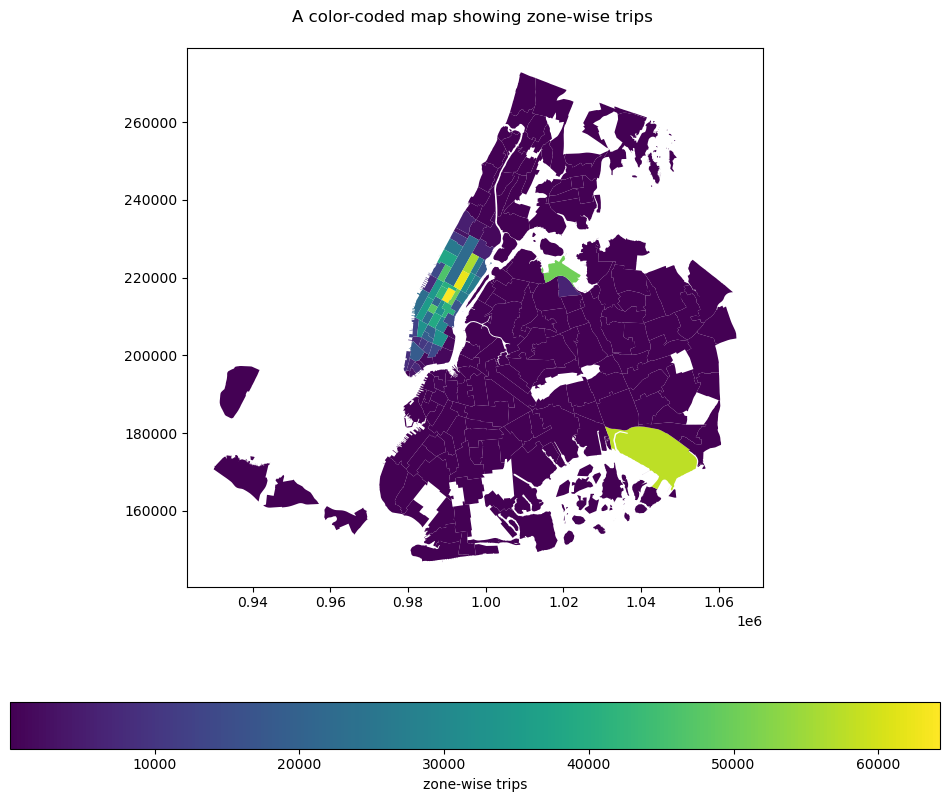

In [2230]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

zones_df.plot(column = 'trip_count',
ax = ax,
legend = True,
legend_kwds = {'label': "zone-wise trips", 'orientation': "horizontal"}
)
 # Adding title 
plt.title('A color-coded map showing zone-wise trips \n')
plt.show()

In [2263]:
# can you try displaying the zones DF sorted by the number of trips?

zones_df.sort_values('trip_count',ascending=False)

OBJECTID  Shape_Leng  Shape_Area                             zone_x  \
127       161    0.035804    0.000072                     Midtown Center   
189       237    0.042213    0.000096              Upper East Side South   
102       132    0.245479    0.002038                        JFK Airport   
188       236    0.044252    0.000103              Upper East Side North   
108       138    0.107467    0.000537                  LaGuardia Airport   
..        ...         ...         ...                                ...   
64         77    0.075461    0.000192  East New York/Pennsylvania Avenue   
29         38    0.083218    0.000327                    Cambria Heights   
162       205    0.141953    0.000766                       Saint Albans   
36         46    0.134475    0.000926                        City Island   
106       136    0.090629    0.000149                Kingsbridge Heights   

     LocationID    borough                                           geometry  \
127         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
189         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
102         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
188         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
108         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
..          ...        ...                                                ...   
64           77   Brooklyn  POLYGON ((1012068.989 185393.105, 1012181.197 ...   
29           38     Queens  POLYGON ((1057380.088 195339.731, 1057919.545 ...   
162         205     Queens  POLYGON ((1049028.76 195325.647, 1049096.735 1...   
36           46      Bronx  MULTIPOLYGON (((1043853.395 252845.891, 104386...   
106         136      Bronx  POLYGON ((1011917.87 255536.029, 1012067.463 2...   

     trip_count  
127       64264  
189       62372  
102       57765  
188       56125  
108       50414  
..          ...  
64            1  
29            1  
162           1  
36            1  
106           1  

[213 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [2265]:
# Find routes which have the slowest speeds at different times of the day
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325776 entries, 0 to 1334270
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1325776 non-null  int64         
 1   tpep_pickup_datetime   1325776 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1325776 non-null  datetime64[ns]
 3   passenger_count        1325776 non-null  float64       
 4   trip_distance          1325776 non-null  float64       
 5   RatecodeID             1325776 non-null  float64       
 6   store_and_fwd_flag     1325776 non-null  object        
 7   PULocationID           1325776 non-null  int64         
 8   DOLocationID           1325776 non-null  int64         
 9   payment_type           1325776 non-null  int64         
 10  fare_amount            1325776 non-null  float64       
 11  extra                  1325776 non-null  float64       
 12  mta_tax                1325776 no

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [2267]:
# Visualise the number of trips per hour and find the busiest hour

# Creating column Hour 
df['Hour'] = df['tpep_pickup_datetime'].dt.hour

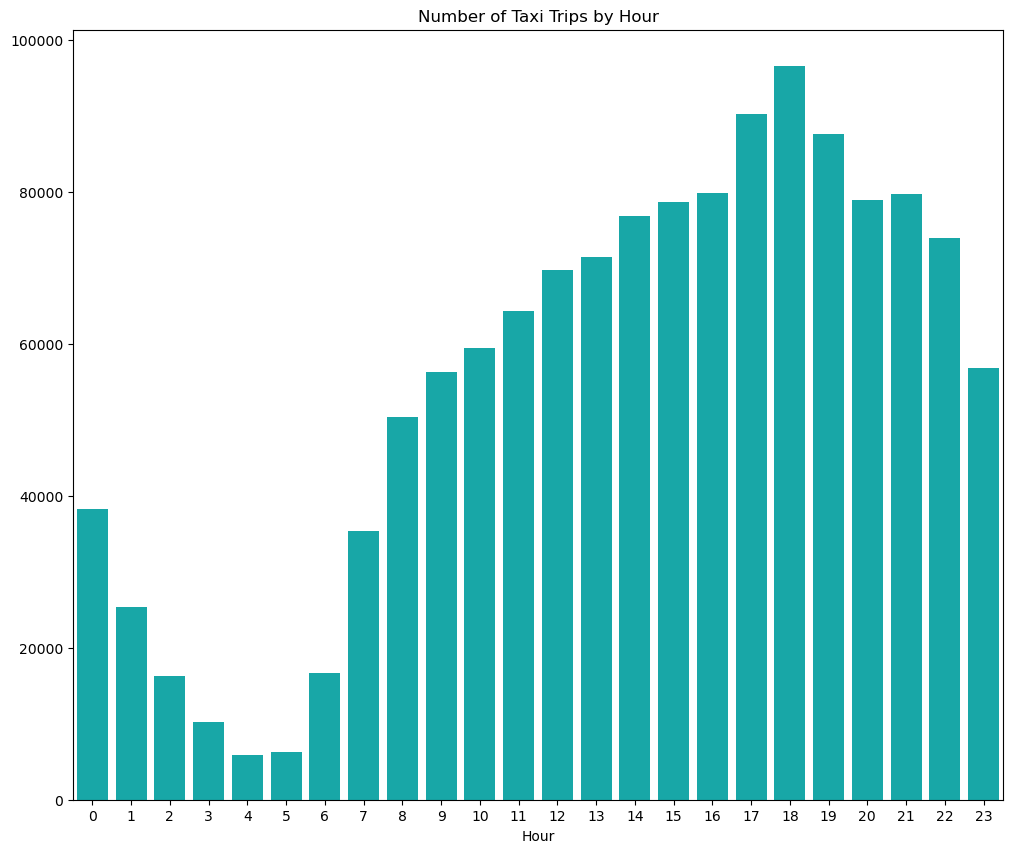

Hourly number of trip :
 Hour
18    89234
17    82151
19    80574
21    73406
20    72235
16    70951
15    69980
14    68189
22    67743
13    64236
12    63695
11    59085
10    54567
9     52140
23    50637
8     47270
0     35099
7     33052
1     24293
2     15916
6     14808
3      9922
4      5547
5      5410
Name: trip_count, dtype: int64


In [2277]:
# Setting plot size 

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

trips_per_hour = df['Hour'].value_counts().sort_index()
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values,color='c')
plt.title("Number of Taxi Trips by Hour")
plt.show()

print('Hourly number of trip :\n',trip_per_hr.sort_values(ascending=False))

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [2279]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

no_trip_scaled = trips_per_hour/sample_fraction

print('The actual number of trips in the five busiest hours \n',no_trip_scaled.sort_values(ascending=False).head(),'\n')

print('Total Trips by Hour \n',no_trip_scaled)

The actual number of trips in the five busiest hours 
 Hour
18    1931220.0
17    1805060.0
19    1752600.0
16    1598380.0
21    1595340.0
Name: count, dtype: float64 

Total Trips by Hour 
 Hour
0      766240.0
1      508800.0
2      326720.0
3      203600.0
4      117180.0
5      124480.0
6      334060.0
7      708300.0
8     1008560.0
9     1127540.0
10    1188580.0
11    1286900.0
12    1395300.0
13    1429560.0
14    1537620.0
15    1573280.0
16    1598380.0
17    1805060.0
18    1931220.0
19    1752600.0
20    1579160.0
21    1595340.0
22    1479760.0
23    1137280.0
Name: count, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [2282]:
# Compare traffic trends for the week days and weekends

In [2284]:
# Creating new column to capture day of week
df['Day'] =  df['tpep_pickup_datetime'].dt.day_name()

# Creating new column to capture whether is a weekend or weekday
df['weekpart'] = df['Day'].apply( lambda x : 'Weekend' if x in(['Satruday','Sunday']) else 'Weekday')


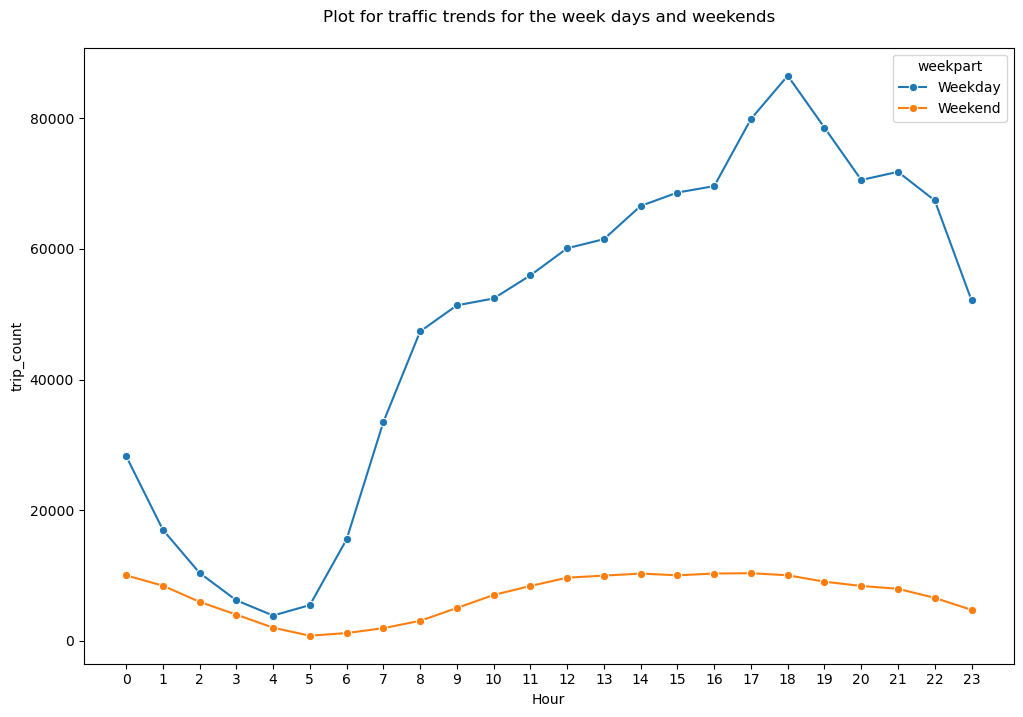

In [2286]:

traffic_trend = df.groupby(['Hour','weekpart']).size().reset_index(name='trip_count')

fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.lineplot(data=traffic_trend,x='Hour',y='trip_count',hue='weekpart',marker='o')
plt.title('Plot for traffic trends for the week days and weekends\n')
plt.xticks(range(0,24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [2290]:
# Find top 10 pickup and dropoff zones

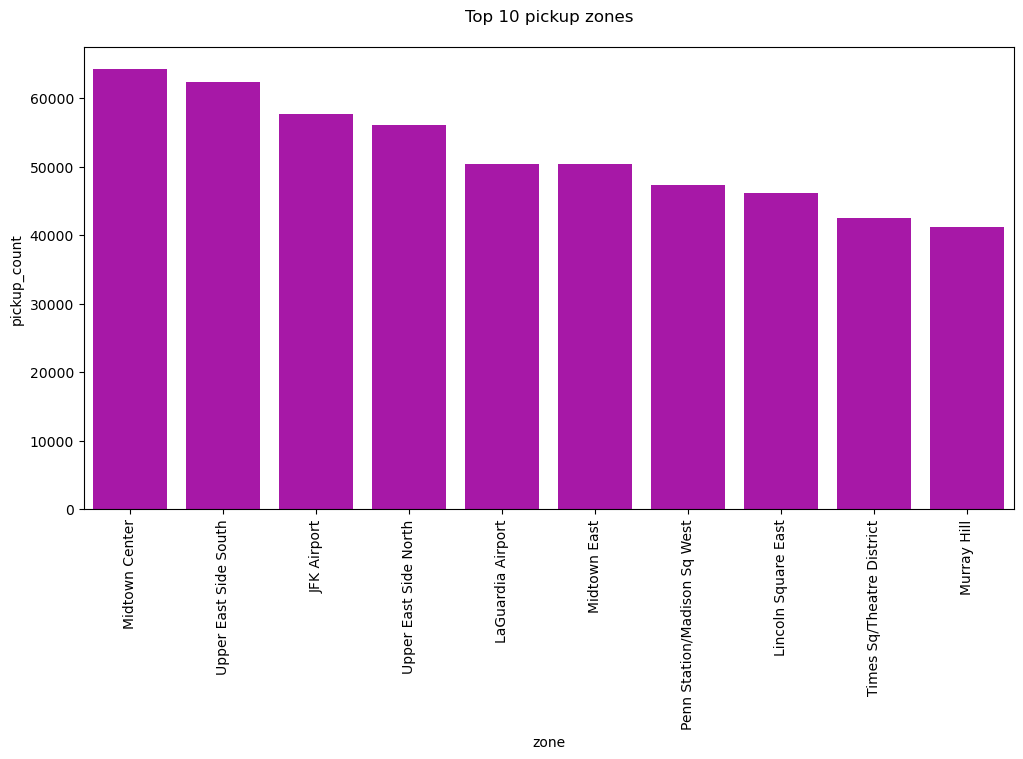

In [2296]:
# Top 10 pickup zones

plt.figure(figsize=(12, 6)) 
pickup_df = df['PULocationID'].value_counts().sort_values(ascending=False).reset_index()
pickup_df.rename(columns={'count':'pickup_count'},inplace=True)
top10_pickup_df = pickup_df.merge(zones,left_on='PULocationID',right_on='LocationID',how='inner')
sns.barplot(data=top10_pickup_df.head(10),x='zone',y='pickup_count',color='m')
plt.title("Top 10 pickup zones\n")
plt.xticks(rotation=90)
plt.show()

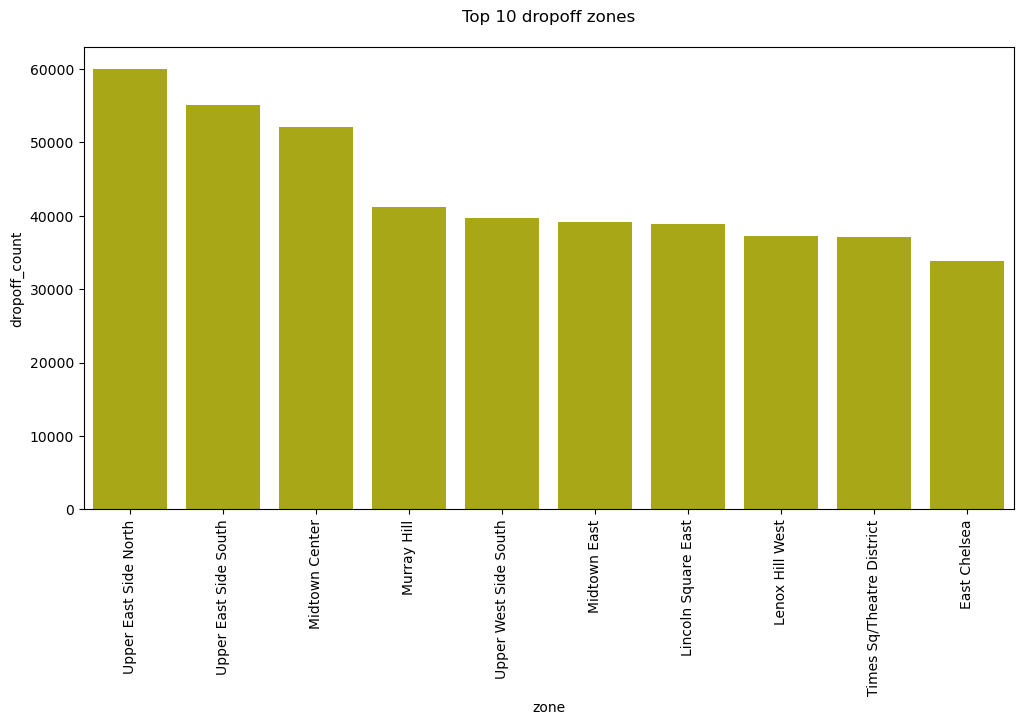

In [2298]:
# Top 10 dropoff zones

plt.figure(figsize=(12, 6)) 
dropoff_df = df['DOLocationID'].value_counts().sort_values(ascending=False).reset_index()
dropoff_df.rename(columns={'count':'dropoff_count'},inplace=True)
top10_dropoff = dropoff_df.merge(zones,left_on='DOLocationID',right_on='LocationID',how='inner')
sns.barplot(data=top10_dropoff.head(10),x='zone',y='dropoff_count',color='y')
plt.title("Top 10 dropoff zones\n")
plt.xticks(rotation=90)
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [2305]:
# Conconating two data frame in single 
zone_ratio = pd.concat([dropoff_df,pickup_df],axis=1)

# Merging back to zone_ration data frame 
z_ratio = zone_ratio.merge(zones,left_on='DOLocationID',right_on='LocationID',how='inner')

# Creating new column to store ration 
z_ratio['Ratio'] = z_ratio['pickup_count']/z_ratio['dropoff_count']

# Top 10 pickup zone
top10_pickup_ratio  = z_ratio.sort_values(by='Ratio',ascending=False).head(10)

# Bottom 10 pickup zone
bottom10_dropoff_ratio = z_ratio.sort_values(by='Ratio',ascending=True).head(10)

print("Top 10 pickup ratio:\n", top10_pickup_ratio[['zone','Ratio']].reset_index(drop=True))

print('\n\n')

print("Top 10 drop off ratio: \n", bottom10_dropoff_ratio[['zone','Ratio']].reset_index(drop=True))

Top 10 pickup ratio:
                     zone     Ratio
0            Murray Hill  1.361035
1           Midtown East  1.286726
2  Upper West Side South  1.269011
3        Lenox Hill West  1.241026
4           East Chelsea  1.217627
5    Lincoln Square East  1.217041
6  Upper West Side North  1.205847
7          Midtown North  1.204461
8           Clinton East  1.158225
9               Union Sq  1.157972



Top 10 drop off ratio: 
                    zone     Ratio
0             Bellerose  0.012987
1   Ocean Parkway South  0.012987
2        Brighton Beach  0.013158
3        Pelham Parkway  0.013333
4            Ozone Park  0.013889
5    Woodlawn/Wakefield  0.014286
6             Glen Oaks  0.014493
7   Kingsbridge Heights  0.014493
8            Bronx Park  0.015873
9  Van Nest/Morris Park  0.016129


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [2321]:
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
..             ...                                                ...  
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...  
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  

[263 rows x 7 columns]

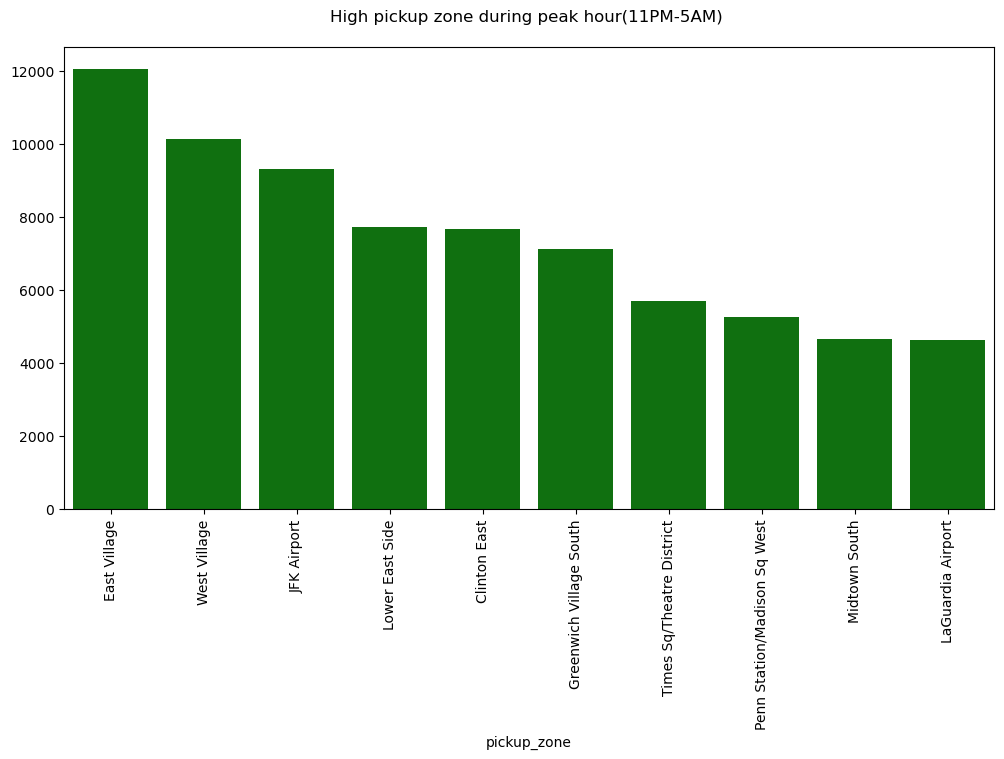

In [2325]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filtering data frame based on night hours
night_trips = df[(df['Hour'] >= 23) | (df['Hour']<=5)]

# Creating data frame for pickup and drop off zones
zones_pickup = zones.rename(columns={'LocationID':'PULocationID','zone': 'pickup_zone'})
zones_dropoff = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

# Merning data frame with night_trip data frame 
night_trips = night_trips.merge(zones_pickup[['PULocationID', 'pickup_zone']], on='PULocationID', how='left')
night_trips = night_trips.merge(zones_dropoff[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')

# Top 10 pickup zone at night hours 
top10_pickup_zone = night_trips['pickup_zone'].value_counts().head(10)

# Top 10 drop off zone at night hours 
top10_dropoff_zone = night_trips['dropoff_zone'].value_counts().head(10)

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top10_pickup_zone.index,y=top10_pickup_zone.values,color='g')
plt.xticks(rotation=90)
plt.title('High pickup zone during peak hour(11PM-5AM) \n')
plt.show()

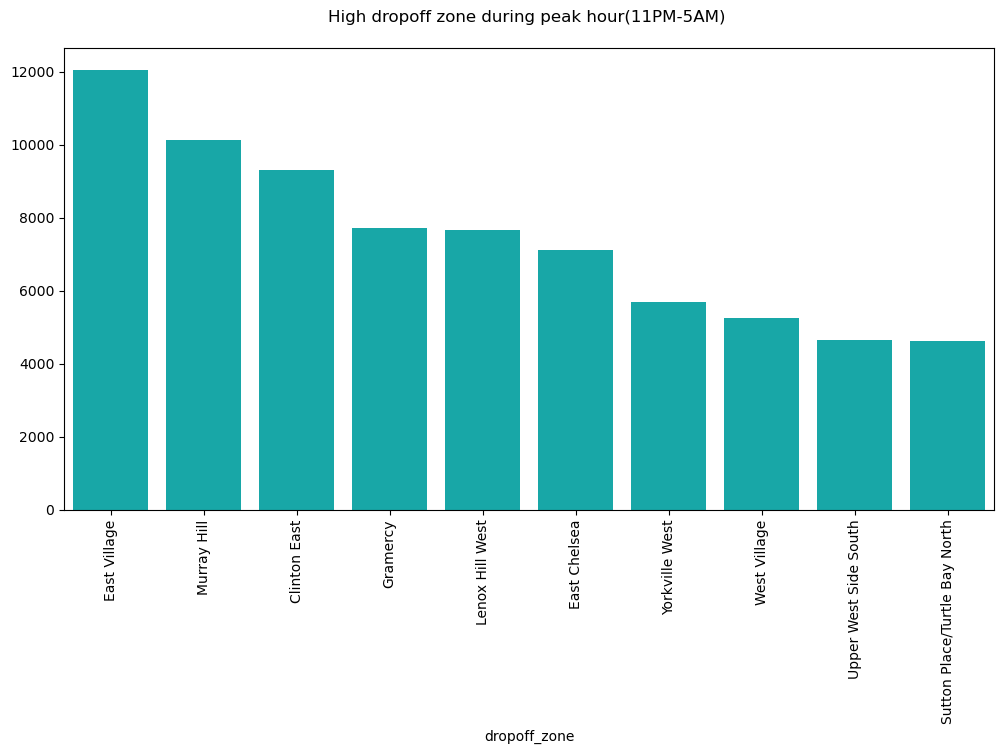

In [2327]:
# Top 10 drop off zone during night 

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top10_dropoff_zone.index,y=top10_pickup_zone.values,color='c')
plt.xticks(rotation=90)
plt.title('High dropoff zone during peak hour(11PM-5AM) \n')
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [2330]:
# Filter for night hours (11 PM to 5 AM)

night_hour = df[(df['Hour'] >= 23) | (df['Hour']<=5)]
daytime_hour = df[~((df['Hour'] >= 23) | (df['Hour']<=5))]

In [2332]:
# Calculating revenue share for night time

night_revenue = round(night_hour['fare_amount'].sum()/(daytime_hour['fare_amount'].sum()+ night_hour['fare_amount'].sum())*100,2)
day_revenue = round(daytime_hour['fare_amount'].sum()/(daytime_hour['fare_amount'].sum()+ night_hour['fare_amount'].sum())*100,2)

print('Revenue share for nighttime hours:', night_revenue)
print('\nRevenue share for daytime hours:', day_revenue)

Revenue share for nighttime hours: 12.34

Revenue share for daytime hours: 87.66


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [2355]:
# Copying original df to new data frame
fare_per_mile = df # Copying data frame

# deriving average fare per mile per passenger 

fare_per_mile['fare_per_mile_per_pass'] = fare_per_mile['fare_amount']/fare_per_mile['trip_distance']*fare_per_mile['passenger_count']

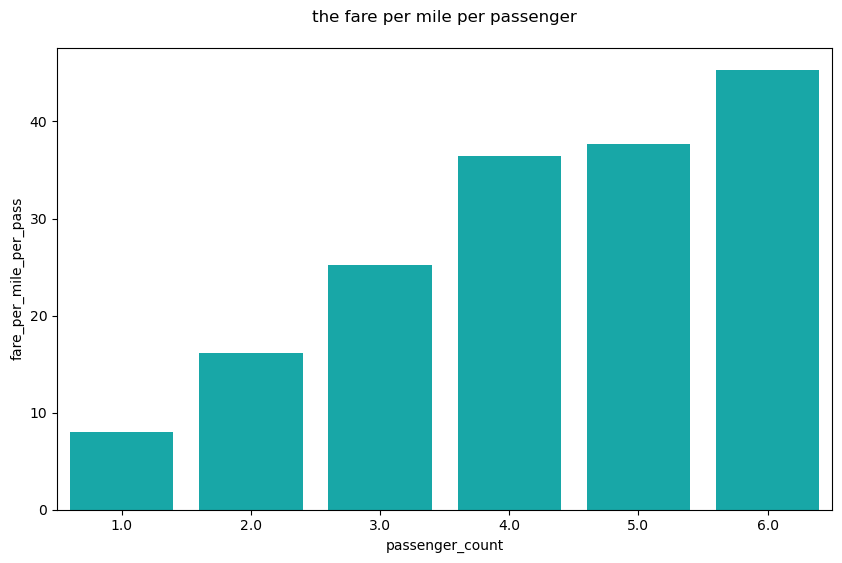

In [2357]:
fare_permile_per_passenger = fare_per_mile.groupby('passenger_count')['fare_per_mile_per_pass'].mean()
fare_permile_per_passenger = fare_permile_per_passenger.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='passenger_count',y='fare_per_mile_per_pass',data=fare_permile_per_passenger,color='c')
plt.title('the fare per mile per passenger\n')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

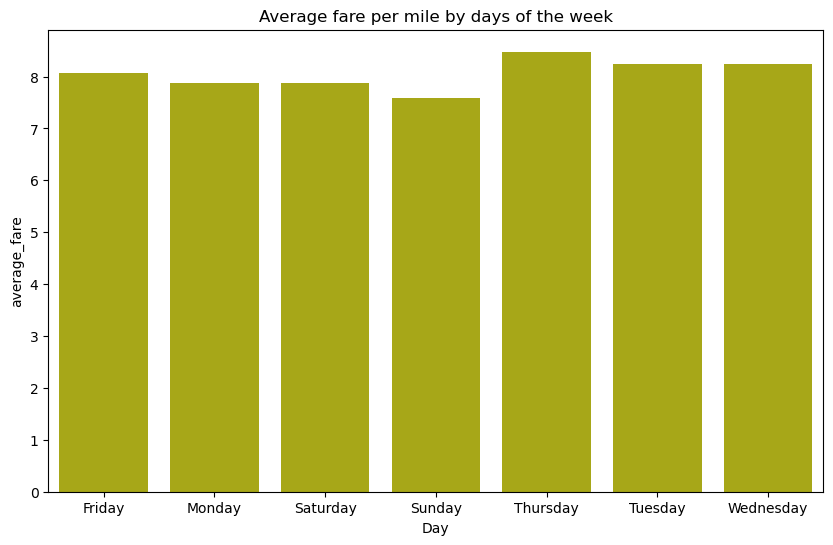

In [2369]:
# Compare the average fare per mile for different days and for different times of the day
fare_per_mile['average_fare'] = fare_per_mile['fare_amount']/fare_per_mile['trip_distance']
day_avg_fare = fare_per_mile.groupby(['Day'])['average_fare'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=day_avg_fare,x='Day',y='average_fare',color='y')
plt.title('Average fare per mile by days of the week')
plt.show()

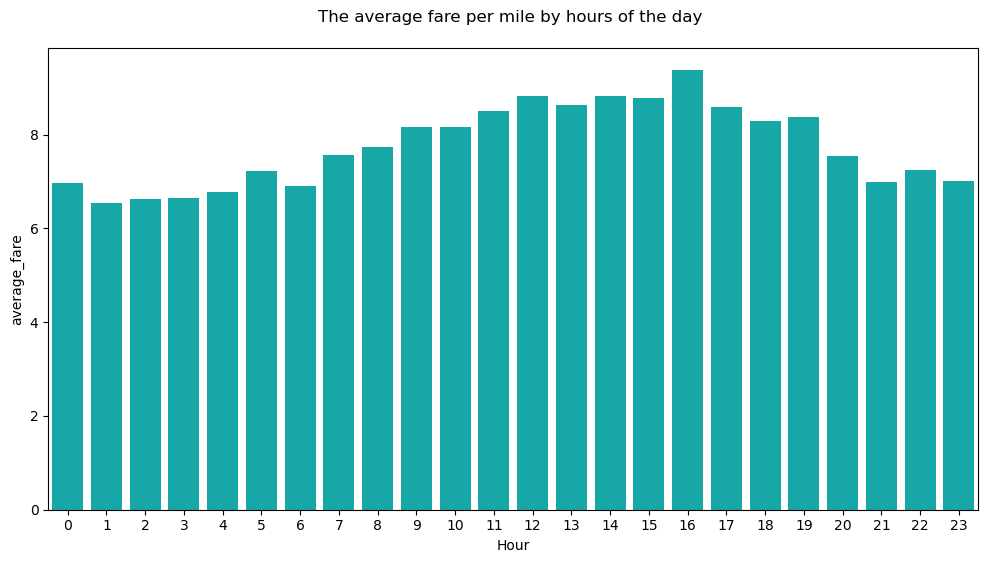

In [2371]:
# the average fare per mile by hours of the day
plt.figure(figsize=(12, 6)) 
day_avg_fare = fare_per_mile.groupby(['Hour'])['average_fare'].mean().reset_index()
day_avg_fare
sns.barplot(data=day_avg_fare,x='Hour',y='average_fare',color='c')
plt.title('The average fare per mile by hours of the day \n')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

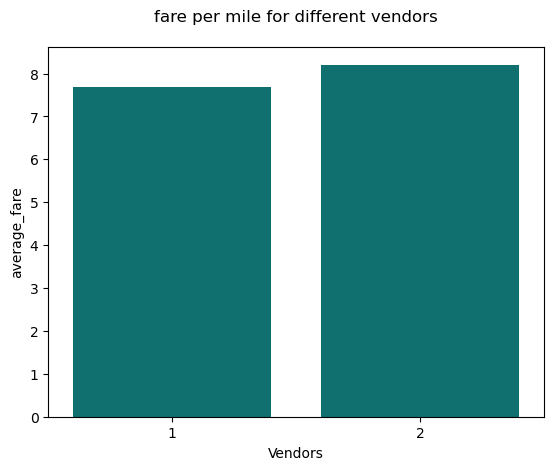

In [2375]:
# Compare fare per mile for different vendors

day_avg_fare = fare_per_mile.groupby(['VendorID'])['average_fare'].mean().reset_index()
sns.barplot(x='VendorID',y='average_fare',data=day_avg_fare,color='teal')

# Adding labels and title
plt.xlabel('Vendors')
plt.title('fare per mile for different vendors\n')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


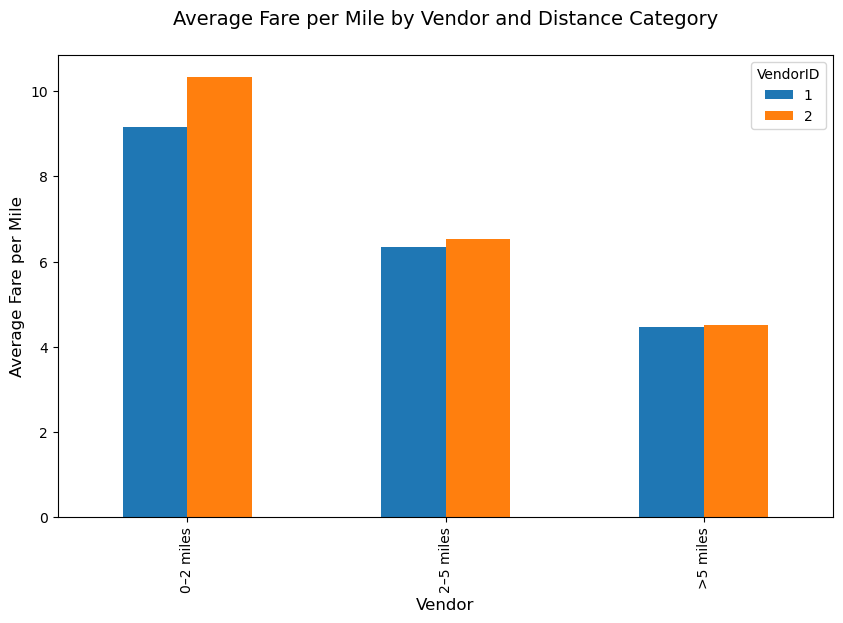

In [2377]:
# Creating differenttiers 

fare_per_mile['DistanceCategory'] = pd.cut(
    fare_per_mile['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['0–2 miles', '2–5 miles', '>5 miles']
)

# Calculating the average fare per mile for distances
fare_per_mile['fare_per_mile'] = fare_per_mile['fare_amount'] / fare_per_mile['trip_distance']

fare_tiered = fare_per_mile.groupby(['DistanceCategory','VendorID'])['fare_per_mile'].mean().round(2).unstack()

fare_tiered.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Average Fare per Mile by Vendor and Distance Category\n', fontsize=14)
plt.xlabel('Vendor', fontsize=12)
plt.ylabel('Average Fare per Mile', fontsize=12)

plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

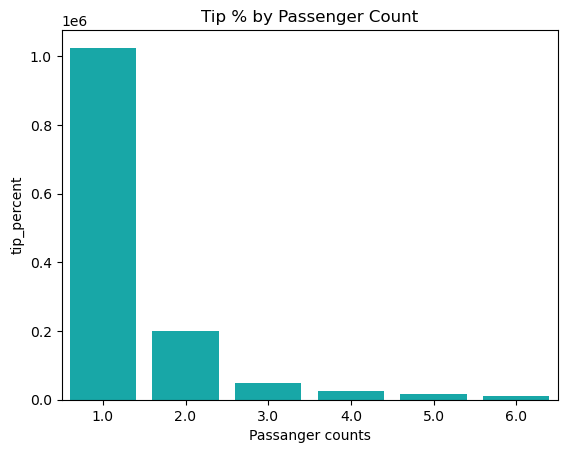

In [2379]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calcualting tip percentage
fare_per_mile['tip_percent'] = (fare_per_mile['tip_amount'] / fare_per_mile['fare_amount']) * 100

# Group by passange_count and tip_percentage 
tip_per_by_pass = fare_per_mile.groupby('passenger_count')['tip_percent'].size().reset_index()
sns.barplot(data=tip_per_by_pass,x='passenger_count',y='tip_percent',color='c')
# Adding labels and title
plt.xlabel('Passanger counts')
plt.title('Tip % by Passenger Count')
plt.show()

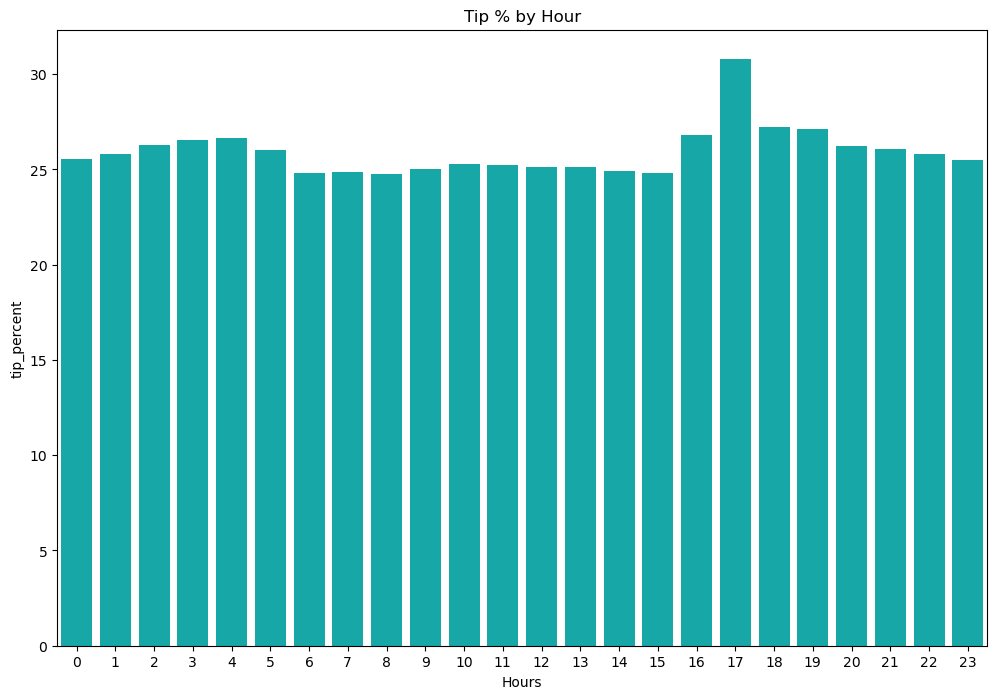

In [2381]:
# Calculating average tip percentages based on time of pickup

tip_per_by_distance = fare_per_mile.groupby('Hour')['tip_percent'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data= tip_per_by_distance,x='Hour',y='tip_percent',color='c')

plt.xlabel('Hours')
plt.title('Tip % by Hour')
plt.show()

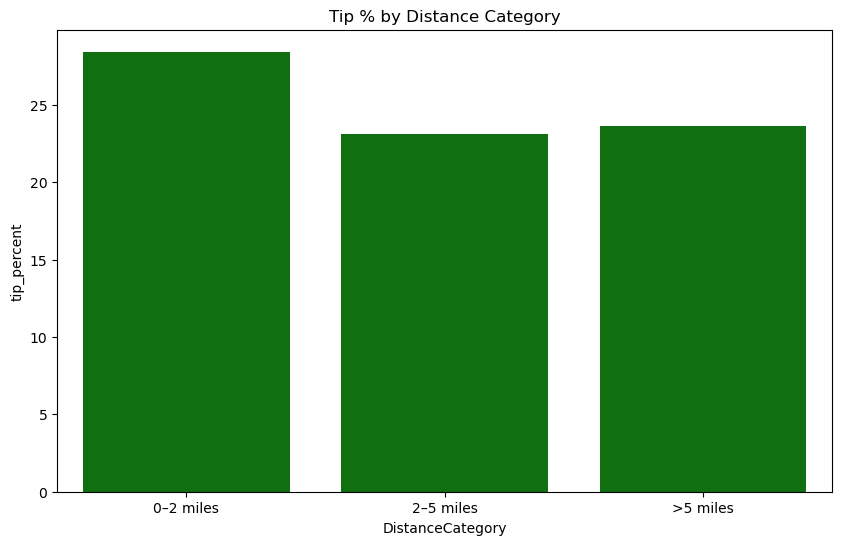

In [2383]:
# Calculating average tip percentages based on trip distances

tip_per_by_distance = fare_per_mile.groupby('DistanceCategory')['tip_percent'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data= tip_per_by_distance,x='DistanceCategory',y='tip_percent',color='g')
plt.title('Tip % by Distance Category')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

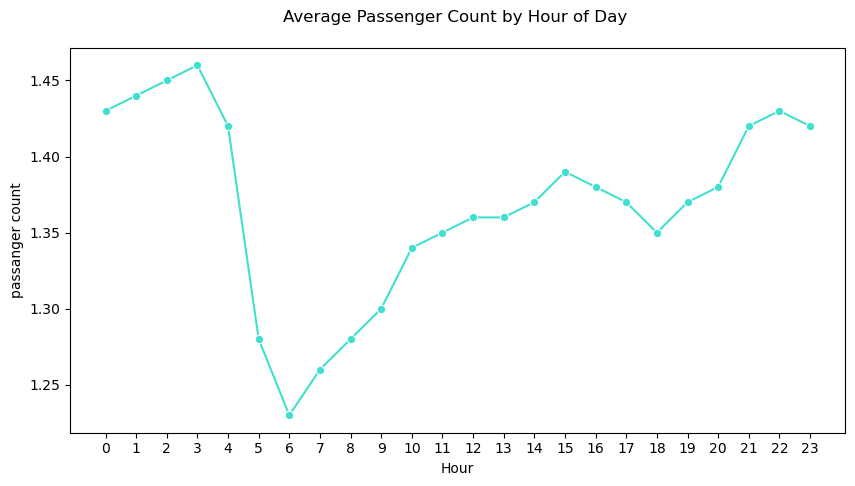

In [2423]:
# See how passenger count varies across hours and days

passenger_by_hour = merged_df.groupby('Hour')['passenger_count'].mean().round(2)
plt.figure(figsize=(10, 5))

# Adding title and ploting 
sns.lineplot(x=passenger_by_hour.index, y=passenger_by_hour.values, marker='o', color='turquoise')

plt.title("Average Passenger Count by Hour of Day \n")
plt.xticks(range(0, 24))
#plt.yticks(range(0,5))
plt.ylabel('passanger count')
plt.show()


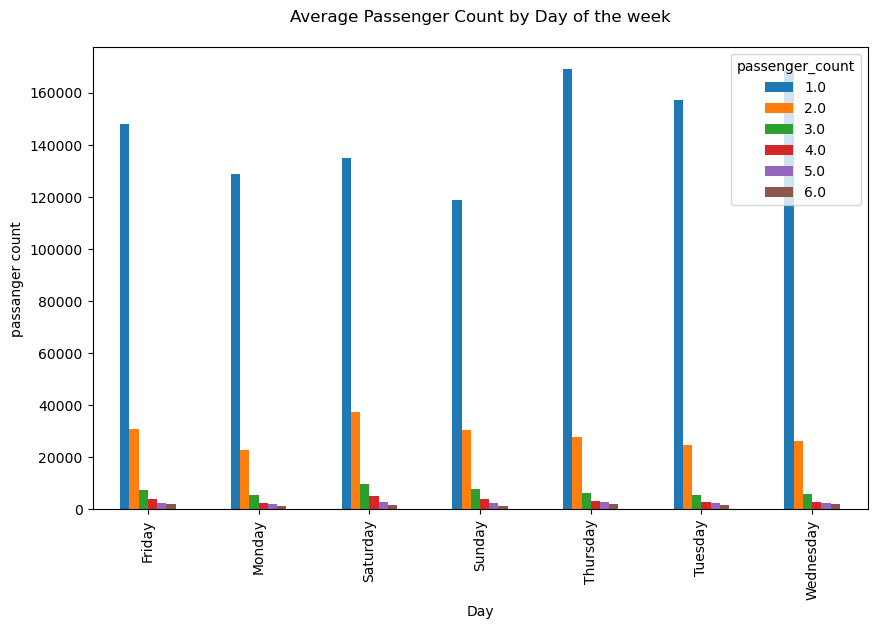

In [2387]:
# variation of passange count over weekdays

passenger_by_week = df.groupby(['Day','passenger_count'])['passenger_count'].count().round(2).unstack()

passenger_by_week.plot(kind='bar',figsize=(10,6))
plt.title("Average Passenger Count by Day of the week\n")
plt.ylabel('passanger count')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

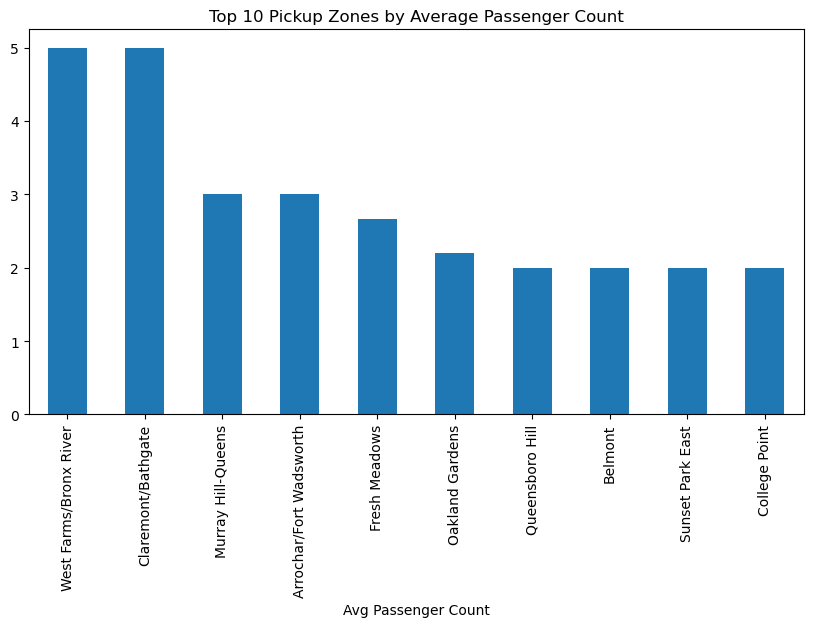

In [2397]:
# How does passenger count vary across zones

passenger_by_zone = trip_df.groupby('zone')['passenger_count'].mean().sort_values(ascending=False).round(2)
plt.figure(figsize=(10, 5))

# Adding title and plotting graph 
passenger_by_zone.head(10).plot.bar()

plt.title("Top 10 Pickup Zones by Average Passenger Count")
plt.xlabel("Avg Passenger Count")

plt.show()

<Axes: >

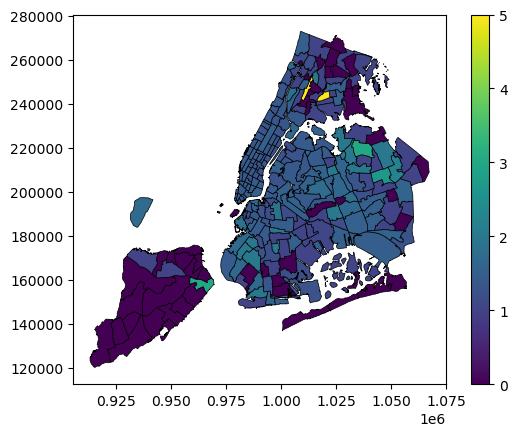

In [2413]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_pass_by_zone = trip_df.groupby('LocationID')['passenger_count'].mean().reset_index()
avg_pass_by_zone['avg_passenger_count'] = avg_pass_by_zone['passenger_count'].round(2)
avg_pass_by_zone.drop(columns='passenger_count', inplace=True)
# Merge into zones GeoDataFrame
zones = zones.merge(avg_pass_by_zone, on='LocationID', how='left')

# Fill NaN (zones with no trips) with 0
zones['avg_passenger_count'] = zones['avg_passenger_count'].fillna(0)

zones.plot(
    column='avg_passenger_count',
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.